# Analysis of sales of an international company

__Target:__ understand which regions, products, and channels generate the most profit and provide business recommendations.

In [54]:
#We import the libraries necessary for work
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Setting up graph display
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

#Connecting the dataset
df = pd.read_csv('sales.csv')
#Checking if the dataset has loaded
df.head() 

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,month,year,shipping_days
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05,2010,30
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08,2012,24
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05,2014,6
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06,2014,15
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02,2013,5


In [58]:
#Initial data review
print(df.shape)           
print(df.columns)           
df.info()             
print(df.describe())         

(100, 17)
Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit', 'month',
       'year', 'shipping_days'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          100 non-null    object        
 1   country         100 non-null    object        
 2   item_type       100 non-null    object        
 3   sales_channel   100 non-null    object        
 4   order_priority  100 non-null    object        
 5   order_date      100 non-null    datetime64[ns]
 6   order_id        100 non-null    int64         
 7   ship_date       100 non-null    datetime64[ns]
 8   units_sold      100 non-null    int64         
 9   unit_price      100 non-null

In [59]:
#We remove spaces and convert everything to lowercase for easier work.
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

#Removing complete duplicates
df = df.drop_duplicates()

In [60]:
#Converting date column types to datetime, and incorrect dates in NaT
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=False)
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce', dayfirst=False)

#Checking the number of empty dates
df['order_date'].isnull().sum(), df['ship_date'].isnull().sum()

(np.int64(0), np.int64(0))

In [61]:
#Adding additional columns in the form of month and year
df['month'] = df['order_date'].dt.to_period('M')
df['year'] = df['order_date'].dt.year

#We calculate delivery time in days
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

#We calculate how many days it takes for delivery on average
average_shipping_days = round(df['shipping_days'].mean())
print(f"Average delivery time: {average_shipping_days} days")

Average delivery time: 23 days


In [62]:
#Basic business metrics
total_revenue = df['total_revenue'].sum()
total_profit = df['total_profit'].sum()
unique_orders = df['order_id'].nunique()

#Сalculate the average bill
order_revenue = df.groupby('order_id')['total_revenue'].sum()
average_order_value = order_revenue.mean()

#Information output
print(f"Total revenue: {total_revenue:,.2f}")
print(f"Total profit: {total_profit:,.2f}")
print(f"Number of unique orders: {unique_orders:,}")
print(f"Average order value: {average_order_value:,.2f}")

Total revenue: 137,348,768.31
Total profit: 44,168,198.40
Number of unique orders: 100
Average order value: 1,373,487.68


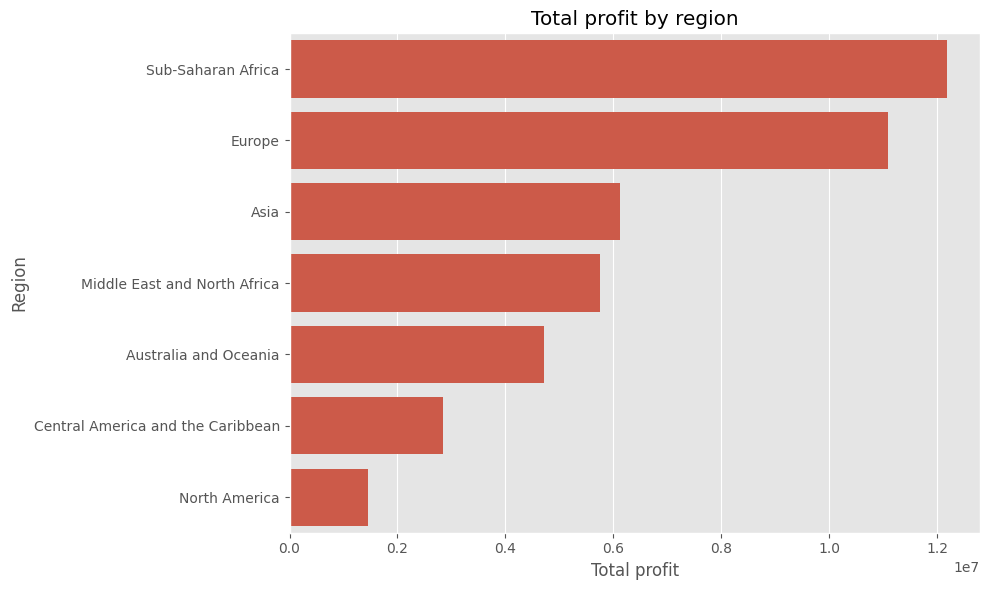

In [63]:
#We calculate profit by region
region_profit = df.groupby('region')['total_profit'].sum().sort_values(ascending=False)
region_profit

#Creating a graph
plt.figure(figsize=(10, 6))
sns.barplot(x=region_profit.values, y=region_profit.index)
plt.title('Total profit by region')   
plt.xlabel('Total profit')
plt.ylabel('Region')
plt.tight_layout()
#Save and display the graph
plt.savefig('ANALYSIS/PROJECT_1/Charts/Sales_chart_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

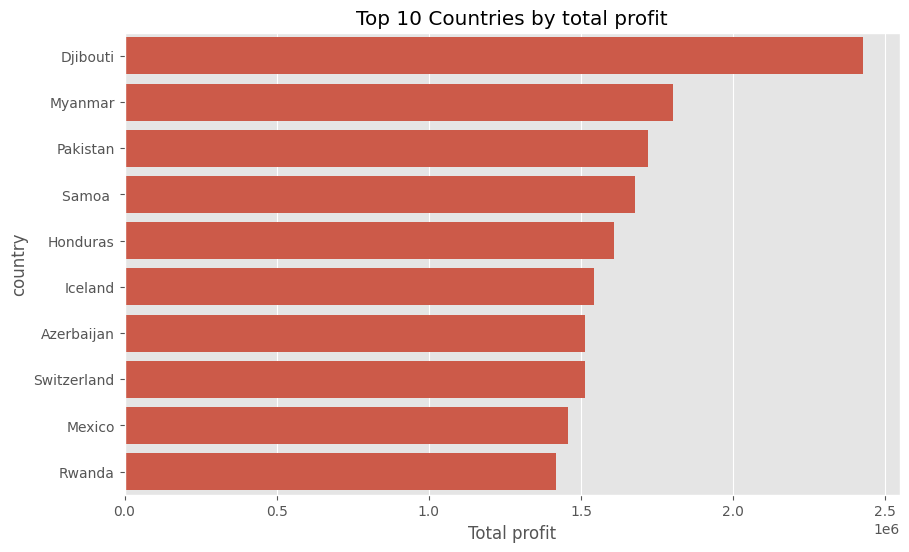

In [69]:
#We count the top 10 countries by income
top_countries = df.groupby('country')['total_profit'].sum().nlargest(10)
top_countries

#Creating a graph
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by total profit')
plt.xlabel('Total profit')
#Save and display the graph
plt.savefig('ANALYSIS/PROJECT_1/Charts/Sales_chart_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

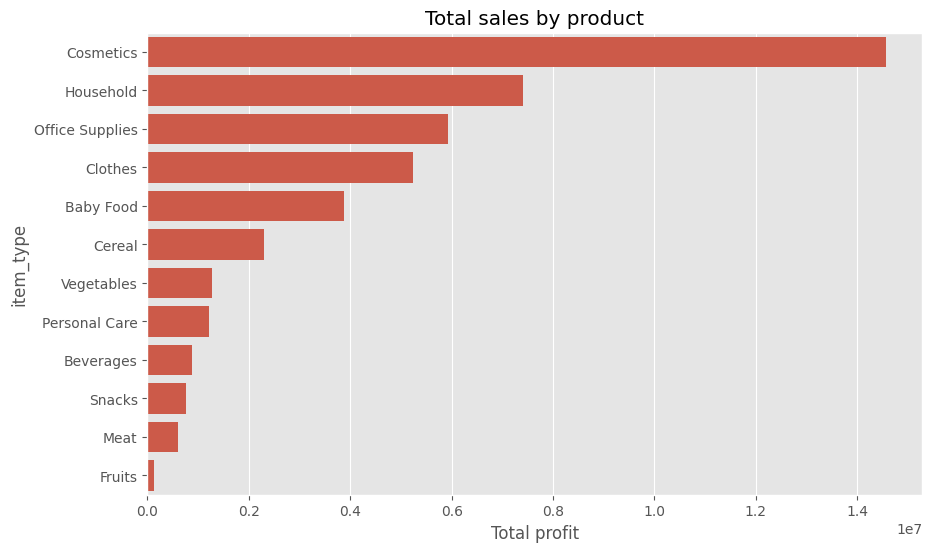

In [70]:
#Analysis of product categories by profit
item_profit = df.groupby('item_type')['total_profit'].sum().sort_values(ascending=False)
item_profit

#Creating a graph
plt.figure(figsize=(10,6))
sns.barplot(x=item_profit.values, y=item_profit.index)
plt.title('Total sales by product')
plt.xlabel('Total profit')
#Save and display the graph
plt.savefig('ANALYSIS/PROJECT_1/Charts/Sales_chart_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

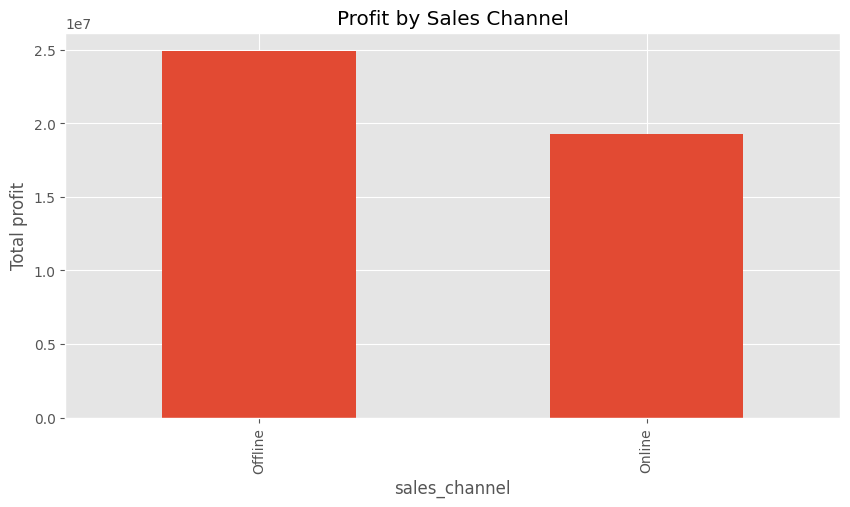

In [71]:
#Comparison of offline and online sales
channel_profit = df.groupby('sales_channel')['total_profit'].sum()
channel_profit

#Visualization
channel_profit.plot(kind='bar')
plt.title('Profit by Sales Channel')
plt.ylabel('Total profit')
#Save and display the graph
plt.savefig('ANALYSIS/PROJECT_1/Charts/Chart_by_sales_source.png', dpi=300, bbox_inches='tight')
plt.show()

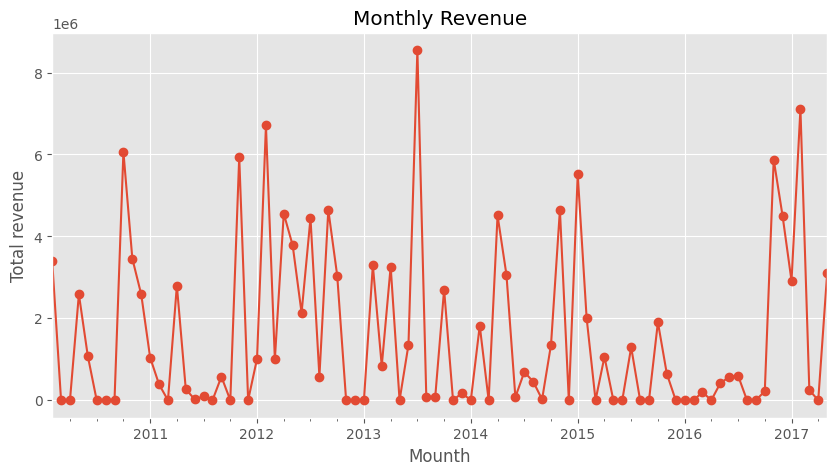

In [72]:
#Comparison of profits by month
monthly_revenue = df.set_index('order_date').resample('ME')['total_revenue'].sum()
monthly_revenue.plot(marker='o')

#Visualization
plt.title('Monthly Revenue')
plt.xlabel('Mounth')
plt.ylabel('Total revenue')
#Save and display the graph
plt.savefig('ANALYSIS/PROJECT_1/Charts/Sales_chart_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

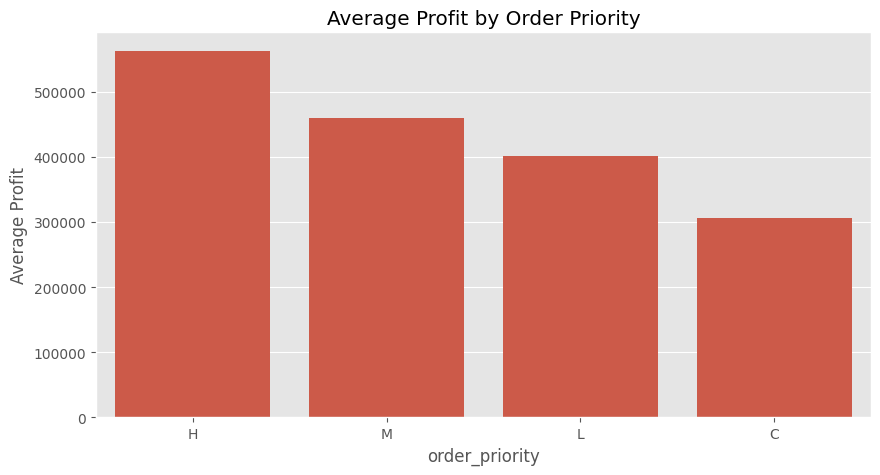

In [73]:
#Impact of order category on profit
priority_profit = df.groupby('order_priority')['total_profit'].mean().sort_values(ascending=False)
priority_profit

#Visualization
sns.barplot(x=priority_profit.index, y=priority_profit.values)
plt.title('Average Profit by Order Priority')
plt.ylabel('Average Profit')
#Save and display the graph
plt.savefig('ANALYSIS/PROJECT_1/Charts/Priority_sales_schedule', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
#Saving the modified dataset
df.to_csv('sales.csv', index=False)

## Sales Analysis Summary

Based on the performed data analysis, the following key insights were identified:

- __Regional Performance__ - The most profitable region is __Sub-Saharan Africa__, followed by __Europe__, which generates almost twice as much profit as third-place Asia. __North America__ is the least profitable region, showing significantly weaker results compared to others.

- __Country-Level Insights__ - __Djibouti__ stands out as the top-performing country with a noticeable lead in total profit. Other countries show more balanced and stable performance, without large deviations.

- __Product Categories__ - __Cosmetics__ is the best-performing category, generating __over 14 million in profit__, more than double the next category - Household products. __Household products__ take second place , while __Meat__ and __Fruits__ show very low profitability and could be reconsidered in the product lineup.

- __Sales Channels__ - __Offline sales outperform online__, but online channels still contribute solid revenue and growth potential.

- __Overall Financials__
   - __Total Revenue:__ 137,348,768.31  
   - __Total Profit:__ 44,168,198.40  
   - __Average Order Value:__ 1,373,487.68  

## Business Recommendations

- __Expand operations in Sub-Saharan Africa and Europe__, as they deliver the highest profit margins.  
Consider investing more in logistics and advertising in these regions to strengthen market dominance.

- __Reassess North American strategy__, as this region underperforms significantly.  
Investigate pricing, competition, or supply chain inefficiencies.

- __Increase focus on high-profit product categories__, especially __Cosmetics__ and __Household goods__.  
Expand inventory and marketing campaigns in these segments.

- __Review low-performing categories__ such as __Meat__ and __Fruits__ - either improve their margins (e.g., through cost optimization) or reduce their presence in the catalog.

- __Support both sales channels__, but prioritize __offline__, which currently delivers higher profit.  
At the same time, develop __online sales__ as a long-term growth area.

- __Evaluate and optimize delivery performance.__
The current __average shipping time is 23 days__, which is relatively long for most business contexts.  
It is recommended to __analyze the supply chain__ and identify opportunities to reduce shipping delays,  
especially if faster delivery could lead to higher customer satisfaction and repeat purchases.

### Summary
The company demonstrates strong sales and profit performance in key regions and categories.  
Focusing on the most profitable markets and optimizing low-performing areas could significantly increase overall profitability.
